In [4]:
%matplotlib inline
import numpy as np
import pandas as pd

from scipy import misc
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten, ConvLSTM2D, BatchNormalization
from keras import optimizers
import keras

from image_fetch import Image_Fetcher

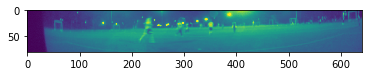

In [12]:
fetcher = Image_Fetcher('data/images/capture/', 'data/labels/rugby_image_labels_2.csv', [240,320])

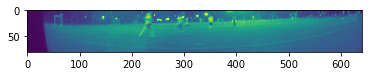

In [16]:
fetcher_off = Image_Fetcher('data/images/capture/', 'data/labels/rugby_image_labels_2.csv', [250,330])

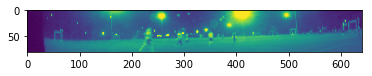

In [24]:
fetcher_under = Image_Fetcher('data/images/capture/', 'data/labels/rugby_image_labels_2.csv', [220,300])

In [26]:
x_u, y_u = fetcher_under.get_all_images_with_labels(msg=False)

0
0
100
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800


In [17]:
x_o, y_o = fetcher_off.get_all_images_with_labels(msg=False)

0
0
100
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800


In [13]:
x, y = fetcher.get_all_images_with_labels(msg=False)

0
0
100
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800


In [14]:
x_c_1, y_c_1 = Image_Fetcher.time_stack_data(x, y, time_frames=2)

chron_X = x_c_1
chron_y = y_c_1
# chron_X, chron_y = Image_Fetcher.time_stack_data(x, y, time_frames=2)

chron_X.shape, chron_y.shape

(2804, 2, 16, 50) (2804,)


((2804, 2, 16, 50), (2804,))

In [18]:
x_c_1_o, y_c_1_o = Image_Fetcher.time_stack_data(x_o, y_o, time_frames=2)

x_c_1_o.shape, y_c_1_o.shape

(2804, 2, 16, 50) (2804,)


((2804, 2, 16, 50), (2804,))

In [27]:
x_c_1_u, y_c_1_u = Image_Fetcher.time_stack_data(x_u, y_u, time_frames=2)

x_c_1_u.shape, y_c_1_u.shape

(2804, 2, 16, 50) (2804,)


((2804, 2, 16, 50), (2804,))

In [5]:
from keras.models import load_model

In [6]:
model = load_model('rcnn.h5')

In [53]:
model_aug = load_model('rcnn_aug.h5')

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (ConvLSTM2D)           (None, None, 14, 48, 3)   444       
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 14, 48, 3)   0         
_________________________________________________________________
input2 (ConvLSTM2D)          (None, 14, 48, 3)         660       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2016)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               258176    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
__________

In [10]:
def add_1(arr, front=False):
    '''
    Becuase keras want a channel dimension
    '''
    if front:
        return arr.reshape([1,*arr.shape])
    return arr.reshape([*arr.shape,1])

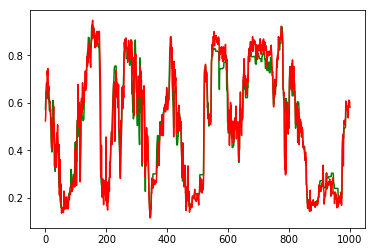

In [15]:
n = 1000
plt.plot(chron_y[:n], c='g')
plt.plot(model.predict(add_1( chron_X[:n]) ), c='r')
plt.show()

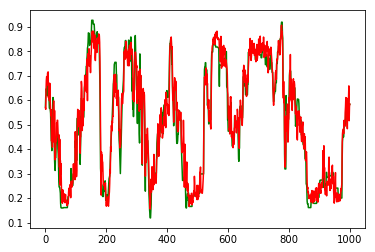

In [54]:
n = 1000
plt.plot(chron_y[:n], c='g')
plt.plot(model_aug.predict(add_1( chron_X[:n]) ), c='r')
plt.show()

In [20]:
model.evaluate(add_1( chron_X[:n]) , chron_y[:n])

1000/1000 [==============================] - 2s 2ms/step


8.9655897350311271

In [55]:
model_aug.evaluate(add_1( chron_X[:n]) , chron_y[:n])

1000/1000 [==============================] - 2s 2ms/step


[0.0030560299139469863, 10.896564064025879]

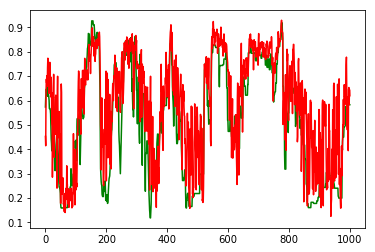

In [19]:
n = 1000
plt.plot(y_c_1_o[:n], c='g')
plt.plot(model.predict(add_1( x_c_1_o[:n]) ), c='r')
plt.show()

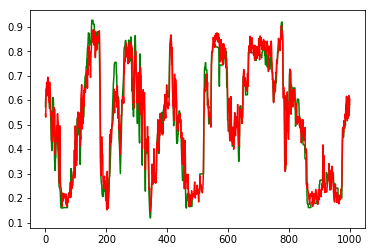

In [56]:
n = 1000
plt.plot(y_c_1_o[:n], c='g')
plt.plot(model_aug.predict(add_1( x_c_1_o[:n]) ), c='r')
plt.show()

In [21]:
model.evaluate(add_1( x_c_1_o[:n]) , y_c_1_o[:n])

1000/1000 [==============================] - 2s 2ms/step


35.082489570617675

In [57]:
model_aug.evaluate(add_1( x_c_1_o[:n]) , y_c_1_o[:n])

1000/1000 [==============================] - 2s 2ms/step


[0.0033649650104343892, 11.058792778015137]

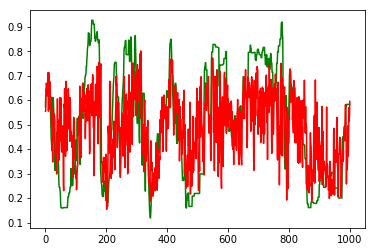

1000/1000 [==============================] - 2s 2ms/step


38.627879272460937

In [28]:
n = 1000
plt.plot(y_c_1_u[:n], c='g')
plt.plot(model.predict(add_1( x_c_1_u[:n]) ), c='r')
plt.show()
model.evaluate(add_1( x_c_1_u[:n]) , y_c_1_u[:n])

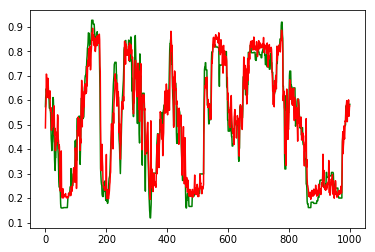

1000/1000 [==============================] - 2s 2ms/step


[0.0041709754969924693, 12.695467144012451]

In [58]:
n = 1000
plt.plot(y_c_1_u[:n], c='g')
plt.plot(model_aug.predict(add_1( x_c_1_u[:n]) ), c='r')
plt.show()
model_aug.evaluate(add_1( x_c_1_u[:n]) , y_c_1_u[:n])

# Clear overfitting on verticle positioning (need to augment)